https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [2]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip3 install tqdm

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/kurmukovai/ds-for-business/88ded3b36c5cc97c26756b4c62c98bbbf99deba3/2022/seminar-5/CC%20GENERAL.csv')
df.dropna(inplace=True)
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Credit Card dataset

- CUST_ID - Identification of Credit Card holder (Categorical)
- BALANCE - Balance amount left in their account to make purchases
- BALANCE_FREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES - Amount of purchases made from account
- ONEOFF_PURCHASES - Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES - Amount of purchase done in installment
- CASH_ADVANCE - Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY - How frequently the cash in advance being paid
- CASH_ADVANCE_TRX - Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX - Numbe of purchase transactions made
- CREDIT_LIMIT - Limit of Credit Card for user
- PAYMENTS - Amount of Payment done by user
- MINIMUM_PAYMENTS - Minimum amount of payments made by user
- PRC_FULL_PAYMENT - Percent of full payment paid by user
- TENURE - Tenure of credit card service for user

# Make customer_id to be an index

In [5]:
df.CUST_ID.nunique(), df.shape

(8636, (8636, 18))

In [6]:
df.index = df['CUST_ID']
df = df.drop('CUST_ID', axis=1)
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Start with basic EDA

In [7]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


# 1. Plot features distribution

- Plot a 3 by 6 plot with each subplot representing a  histogramm of features' distribution (e.g. using `plt.subplots(...)`). 
- Add title for each subplot, and format its fontsize.
- Remove last (empty) subplot or make it invisible

save the resulting graph to pdf and upload to the reporting form.

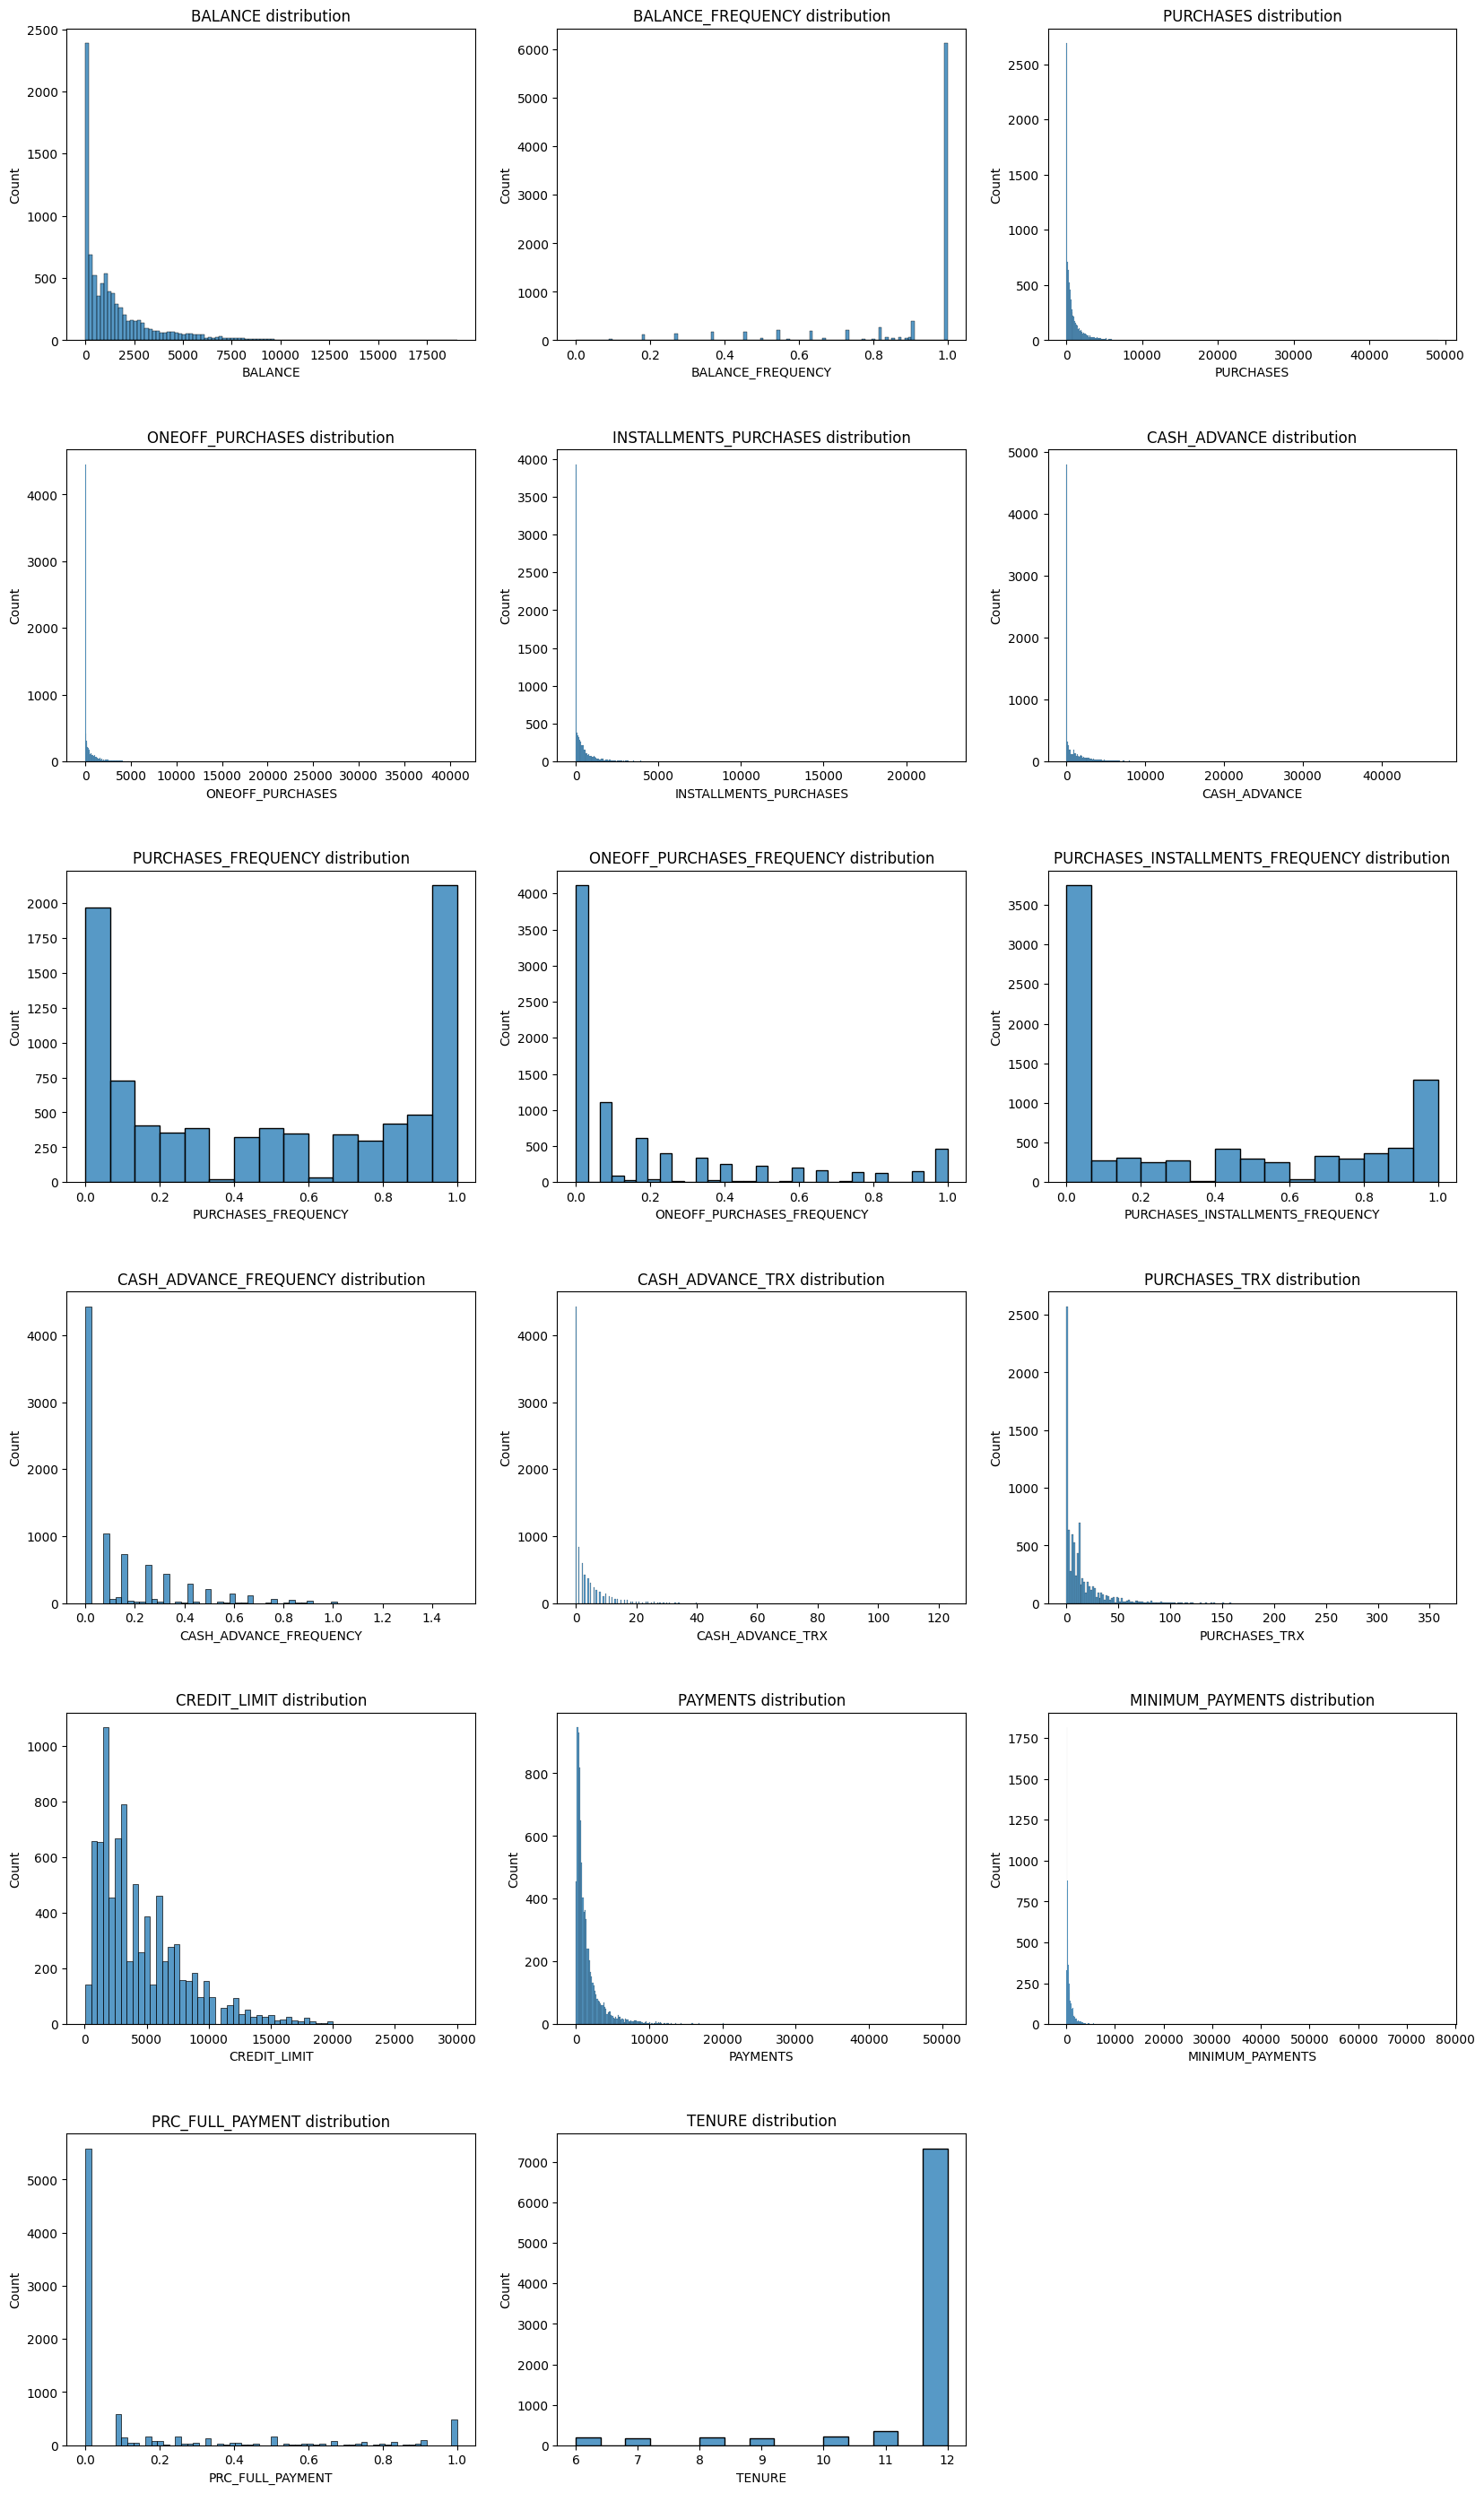

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=3, nrows=6)
fig.set_size_inches(20, 35)

for col, ax in zip(df, axes.flat):
    sns.histplot(df[col], ax=ax).set(title=f'{col} distribution')

fig.subplots_adjust(hspace=0.35)
axes[-1, -1].axis('off')
plt.savefig('distibution.pdf', format='pdf', dpi=600)
plt.show()

# 2. Preprocess features

All clustering algorithms requires some kind of feature standartization.
We will use standartization (or "z-scoring"):

$$X_{std} = \frac{X - mean(X)}{std(X)}$$

What is the mean of all columns in `X_std`? What is the standard deviation of all columns in `X_std`?


## Scientific notation

Recall that sometimes Python uses a so-called scientific notation for small numbers, e.g. notation `6.993531e-17` by definition is: 

$6.993531 \cdot 10^{-17} = \frac{6.993531}{10^{17}} = 0.00000000000000006993531$.

For more details, see https://sparrow.dev/python-scientific-notation/ .

For the purposes of this home assignment all numbers with absolute value smaller than $0.000001$ are effectively $0$.

In [10]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
sca.fit(df)
X_standardized = sca.transform(df)
X_standardized.shape

(8636, 17)

In [11]:
print(f"Mean value: {round(X_standardized.mean(), 7)}")
print(f"Standard deviation value: {X_standardized.var()}")

Mean value: -0.0
Standard deviation value: 1.0


# 3. KMeans

What does K in KMeans means?


"K" stands for the number of clusters to look for in the data.

# Run KMeans with 5 clusters

In [12]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [13]:
kmeans = KMeans(n_clusters=5, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

In [14]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1107, 1355, 2334, 3754,   86]))

# 4. Run Kmeans with different number of clusters


Which number of clusters is optimal according to silhouette score?


In [15]:
def run_kmeans(x, kmin=2, kmax=20):
    inertia = []
    for k in tqdm(range(kmin, kmax+1)):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(x)
        results_df[f'clusters_kmeans_{k}'] = kmeans.predict(x)
        inertia.append(kmeans.inertia_)
    return inertia

In [16]:
results_df = pd.DataFrame()
kmin, kmax = 2, 20
n_clusters = range(kmin, kmax+1)

# standardized
inertia = run_kmeans(X_standardized, kmin, kmax)

100%|██████████| 19/19 [00:00<00:00, 23.00it/s]


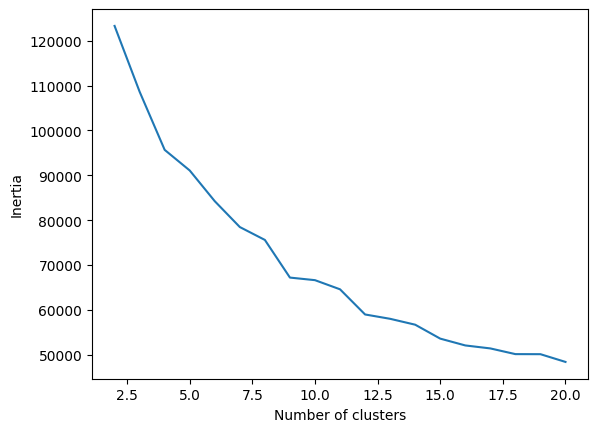

In [17]:
plt.plot(n_clusters, inertia);
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [18]:
from plot_utils import plot_silhouette
# if you run in google colab copy-paste code from `plot_utils.py` into a notebook cell

For n_clusters = 4 The average silhouette_score is : 0.1970633476945604
For n_clusters = 8 The average silhouette_score is : 0.1892266381391483
For n_clusters = 12 The average silhouette_score is : 0.21771895705090313
For n_clusters = 16 The average silhouette_score is : 0.19986413231372693
For n_clusters = 20 The average silhouette_score is : 0.2037068163716693


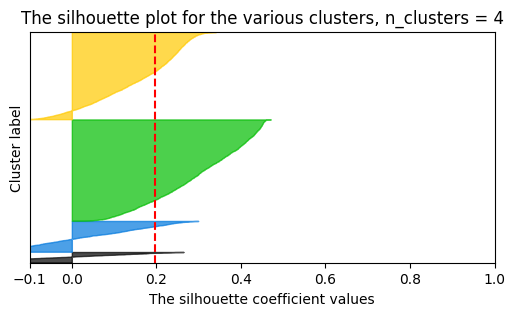

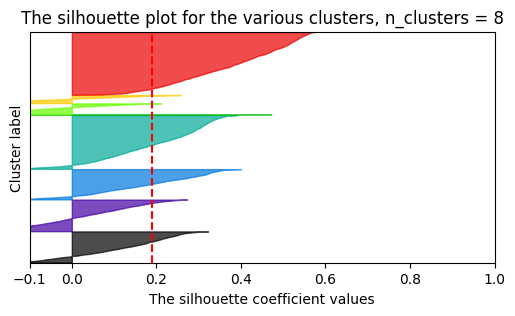

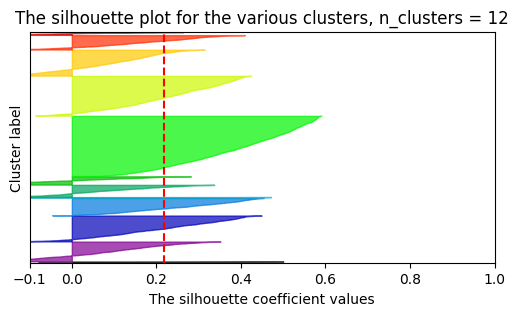

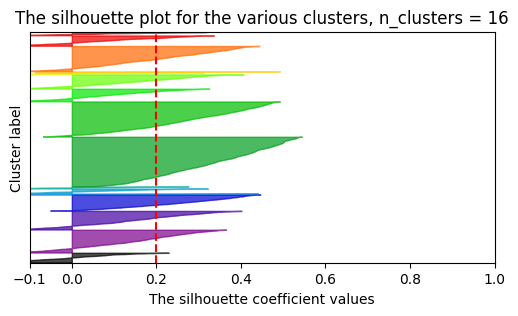

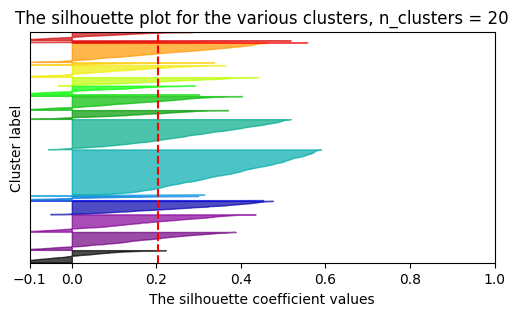

In [19]:
plot_silhouette(X_standardized, kmin=4, kmax=21, step=4)

# 5. Hierarchical clustering

What is hieararchical clustering?


Hierarchical clustering is a technique that groups similar data into clusters using a tree-like structure known as a dendrogram.

# 6. Run hierarchical clustering

with different types of linkage looking for 8-12 clusters (choose one number):
 - "single"
 - "complete"
 - "ward"
 - "average"
 
For each type of linkage print sizes of the resulting clusters. Which of the linkages result in a non-degenerative clustering?

**Degenerative** clustering is a clustering of data into N clusters with most of the data being in a small subset of clusters, and rest of the clusters containing 1-5-10 points each.


In [20]:
from sklearn.cluster import AgglomerativeClustering

single_clust = AgglomerativeClustering(n_clusters=10, linkage="single").fit(X_standardized)
complete_clust = AgglomerativeClustering(n_clusters=10, linkage="complete").fit(X_standardized)
ward_clust = AgglomerativeClustering(n_clusters=10, linkage="ward").fit(X_standardized)
average_clust = AgglomerativeClustering(n_clusters=10, linkage="average").fit(X_standardized)

In [26]:
def print_labels(labels_, name):
    labels, counts = np.unique(labels_, return_counts=True)
    print(name)
    for label, count in zip(labels, counts):
        print(f"Cluste {label} has {count} elements.")
    print()

In [29]:
print_labels(single_clust.labels_, "Single linkage")

Single linkage
Cluste 0 has 8627 elements.
Cluste 1 has 1 elements.
Cluste 2 has 1 elements.
Cluste 3 has 1 elements.
Cluste 4 has 1 elements.
Cluste 5 has 1 elements.
Cluste 6 has 1 elements.
Cluste 7 has 1 elements.
Cluste 8 has 1 elements.
Cluste 9 has 1 elements.


In [31]:
print_labels(complete_clust.labels_, "Complete linkage")

Complete linkage
Cluste 0 has 20 elements.
Cluste 1 has 8525 elements.
Cluste 2 has 36 elements.
Cluste 3 has 27 elements.
Cluste 4 has 16 elements.
Cluste 5 has 1 elements.
Cluste 6 has 2 elements.
Cluste 7 has 1 elements.
Cluste 8 has 7 elements.
Cluste 9 has 1 elements.


In [32]:
print_labels(ward_clust.labels_, "Ward linkage")

Ward linkage
Cluste 0 has 1879 elements.
Cluste 1 has 414 elements.
Cluste 2 has 998 elements.
Cluste 3 has 852 elements.
Cluste 4 has 679 elements.
Cluste 5 has 23 elements.
Cluste 6 has 1040 elements.
Cluste 7 has 2627 elements.
Cluste 8 has 19 elements.
Cluste 9 has 105 elements.


In [33]:
print_labels(average_clust.labels_, "Average linkage")

Average linkage
Cluste 0 has 14 elements.
Cluste 1 has 16 elements.
Cluste 2 has 4 elements.
Cluste 3 has 15 elements.
Cluste 4 has 4 elements.
Cluste 5 has 1 elements.
Cluste 6 has 1 elements.
Cluste 7 has 1 elements.
Cluste 8 has 5 elements.
Cluste 9 has 8575 elements.


# 7. Plot dendrogram

for Ward linkage from the previous question what distance treshold will result in 10 clusters?


In [34]:
from plot_utils import plot_dendrogram
# if you run in google colab copy paste code from `plot_utils.py` into a notebook cell

10


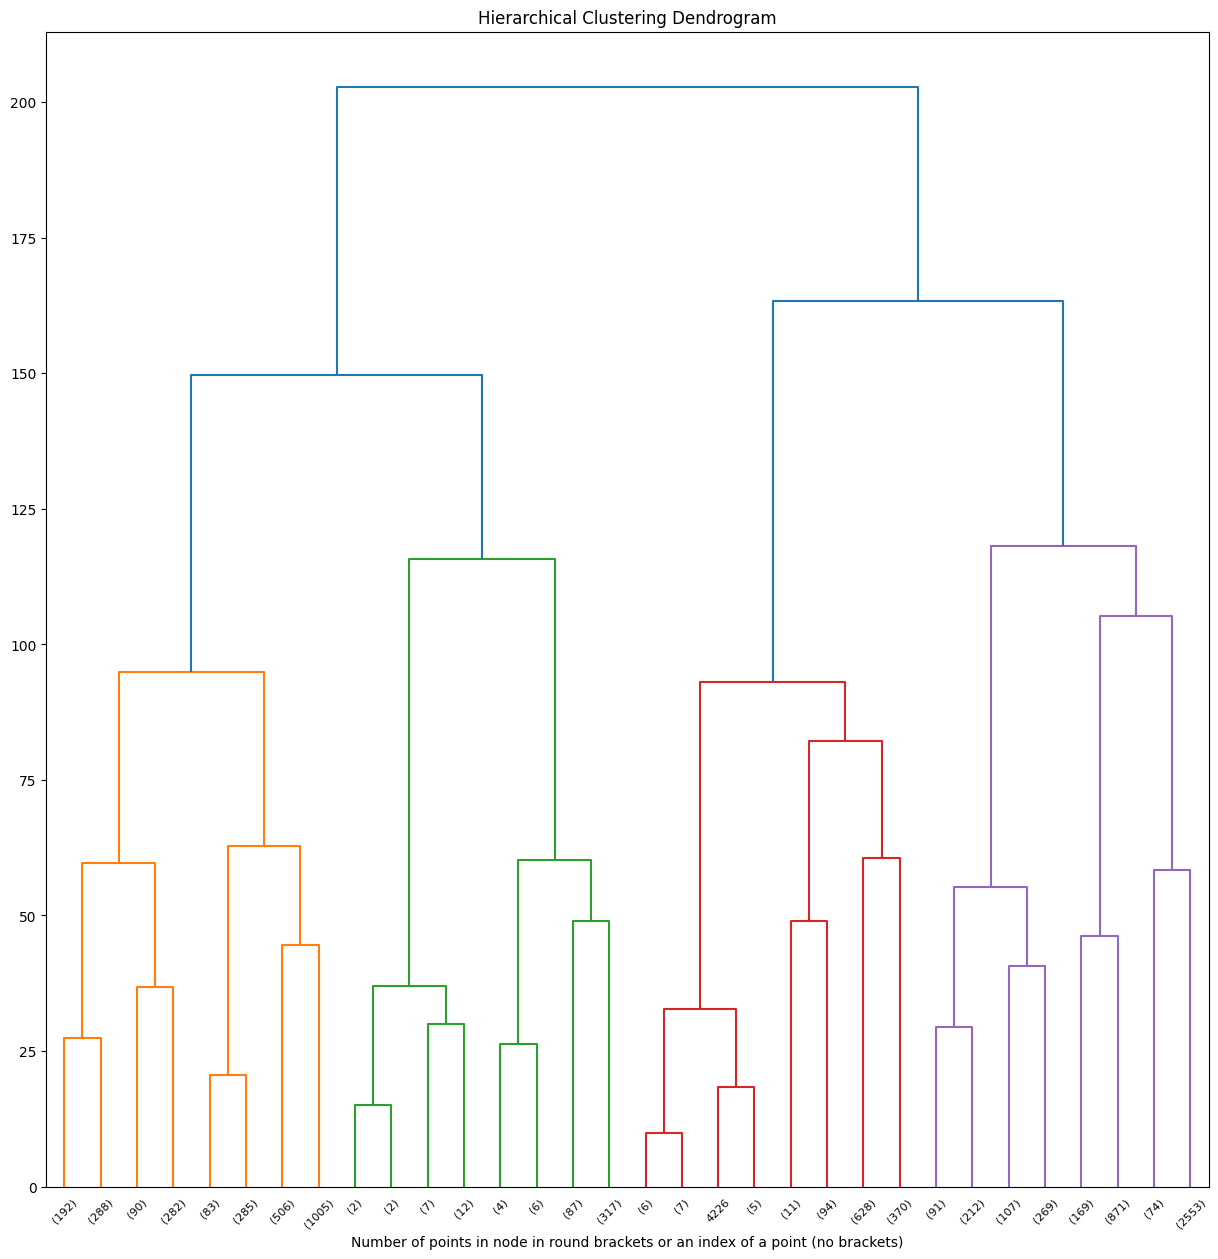

In [44]:
model = AgglomerativeClustering(distance_threshold=75, n_clusters=None, linkage='ward')
model = model.fit(X_standardized)
print(model.n_clusters_)

plt.figure(figsize=(15,15))
plt.title("Hierarchical Clustering Dendrogram") 
plot_dendrogram(model, truncate_mode="level", p=4)# plot the top three levels of the dendrogram
plt.xlabel("Number of points in node in round brackets or an index of a point (no brackets)")
plt.show()

# Visualization

To visualize our multi-dimensional data we will apply two differen dimensionality techniques: PCA and tSNE ("tea-sni")

# 8. Select all true statements about PCA


- Explained variance refers to the proportion of the dataset's total variance that is accounted for by each component.
- PCA linearly combines the original features to construct new, principal components.
- PCA is an unsupervised algorithm mainly used for dimensionality reduction in data.

# Run PCA with 2 components

Unlike kmeans and hierarchical clustering PCA only requires data centering (without data scaling)

In [45]:
X_mean = df - df.mean(axis=0)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(2)
X_pca2 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47493166 0.17814415]
0.653075810711607


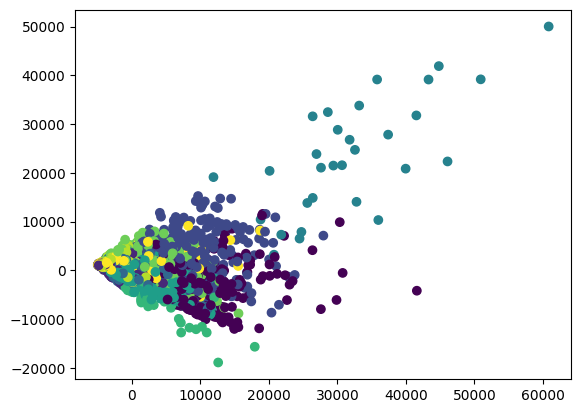

In [48]:
kmeans = KMeans(n_clusters=10, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels); # Use kmeans labels for the color

PCA visualizations are not always informative, we will try using TSNE, but first we need to select the optimal number of PCA components

# 9. Select number of PCA components

based on explained variance ratio. Which minimal number of PCA components explain **atleast 95%** of the data variance (`X_mean`)?


In [49]:
pca = PCA(2)
X_pca2 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47493166 0.17814415]
0.6530758107116078


In [51]:
pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[4.74931658e-01 1.78144152e-01 1.40167702e-01 1.14687098e-01
 4.72362612e-02 2.65945784e-02 1.82304665e-02 6.71500692e-06
 7.32325391e-07 5.91768931e-07]
0.9999999557693015


In [52]:
pca = PCA(12)
X_pca12 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[4.74931658e-01 1.78144152e-01 1.40167702e-01 1.14687098e-01
 4.72362612e-02 2.65945784e-02 1.82304665e-02 6.71500692e-06
 7.32325391e-07 5.91768931e-07 3.61417796e-08 4.08872799e-09]
0.999999995999809


In [57]:
pca = PCA(5)
X_pca5 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47493166 0.17814415 0.1401677  0.1146871  0.04723626]
0.9551668717749464


# These are the `loadings` of the very first Principle component, which explains about 47% of data variance


In [59]:
components = dict(zip(df.columns, pca.components_[0]))
components = sorted(components.items(), key=lambda x: x[1], reverse=True)

for c, w in components:
    print(c, np.round(w, 3))

CREDIT_LIMIT 0.687
PAYMENTS 0.488
PURCHASES 0.295
BALANCE 0.291
CASH_ADVANCE 0.217
ONEOFF_PURCHASES 0.213
MINIMUM_PAYMENTS 0.136
INSTALLMENTS_PURCHASES 0.082
PURCHASES_TRX 0.002
CASH_ADVANCE_TRX 0.0
TENURE 0.0
ONEOFF_PURCHASES_FREQUENCY 0.0
PURCHASES_FREQUENCY 0.0
CASH_ADVANCE_FREQUENCY 0.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0
BALANCE_FREQUENCY 0.0
PRC_FULL_PAYMENT 0.0


# 10. Select all correct statements

based on the whole PCA analysis


- The first principal component explains roughly 47.5% of the variance, which is the largest portion. This means that this component captures the most significant patterns and structures in the data.
- The explained variances suggest that only the first component should be used for further analysis, as it explains the majority of the variance in the data.
Features like 'CASH_ADVANCE_TRX', 'TENURE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE_FREQUENCY', and 'PRC_FULL_PAYMENT' have a zero weight in the first component, meaning they do not influence this component.
- The first principal component, which explains approximately 47.5% of the variance, represents the least significant patterns in the data.
- The weights of the first principal component indicate that 'CREDIT_LIMIT', 'PAYMENTS', and 'PURCHASES' are negatively correlated with this component.
- The weights in the principal component signify the importance of the variables in predicting the cluster labels.
- Examining the weights (also known as 'loadings') of the variables on this first principal component, it's apparent that 'CREDIT_LIMIT', 'PAYMENTS', and 'PURCHASES' are the features most strongly associated with this component. They have the highest weights: 0.687, 0.488, and 0.295 respectively. These high weights suggest that the first principal component might represent a sort of 'financial activity' dimension - with 'CREDIT_LIMIT' perhaps relating to the customer's creditworthiness, 'PAYMENTS' reflecting the customer's payment behavior, and 'PURCHASES' indicating the customer's purchasing behavior.
- Since 'CASH_ADVANCE_TRX', 'TENURE', 'ONEOFF_PURCHASES_FREQUENCY', and other features have a weight of zero in the first component, they are the most important features for this component.

# TSNE visualization

# 11. What is t-SNE?


In [60]:
!pip install opentsne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 894.9 kB/s eta 0:00:00m eta 0:00:010:01:01


In [61]:
from openTSNE import TSNE

pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean)
embedding = TSNE().fit(X_pca10)

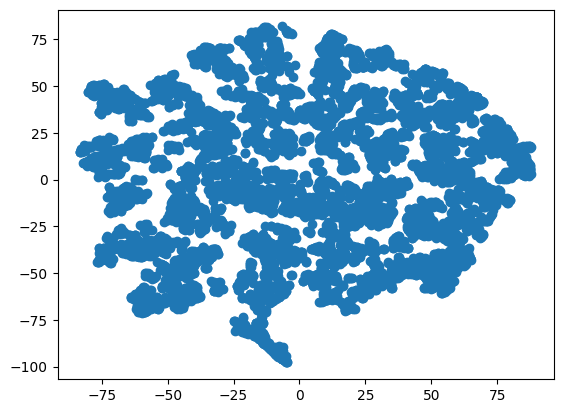

In [62]:
plt.scatter(embedding[:, 0], embedding[:, 1]);

In [63]:
ac = AgglomerativeClustering(n_clusters=8, linkage='ward')
prediction = ac.fit_predict(X_pca10)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([  93, 2336,  795,  165, 4504,   23,  673,   47]))

### tSNE with AgglomerativeClustering labels

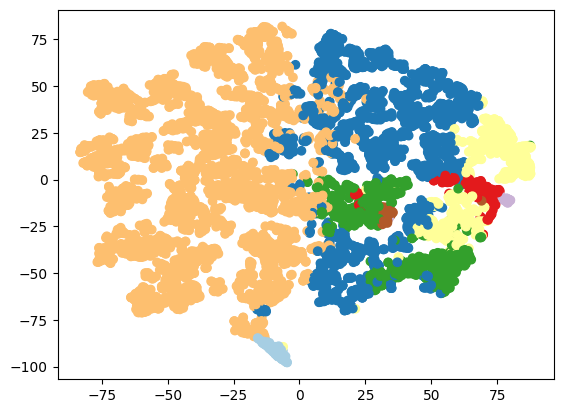

In [64]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=prediction, cmap='Paired');

### tSNE with KMeans clustering labels

In [65]:
kmeans = KMeans(n_clusters=8, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

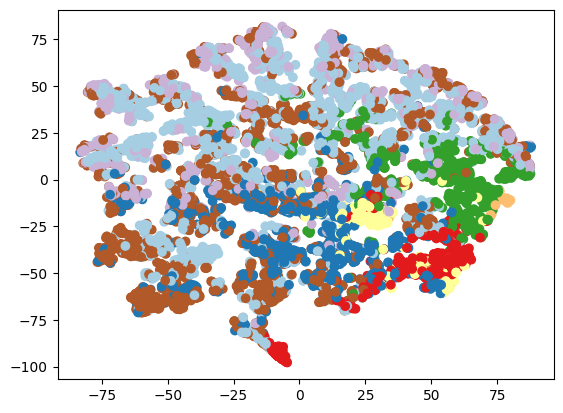

In [66]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired');

# 12. Which metrics are suitable for clusterings comparison?



- normalized mutual information
- adjusted rand index

# 13. Compare Kmeans and Agglomerative clusterings

with 8 clusters using Adjusted Rand Score, what is the value of ARI?


In [73]:
from sklearn.metrics import adjusted_rand_score

round(adjusted_rand_score(labels, prediction), 3)

0.128

Visually KMeans and Agglomerative (with Ward distance) result in drastically different results, we will try to remove data outliers and see if it will affect the results

# Remove outliers

In [74]:
def detect_outliers_very_simple(x, col):
    """A naive outliers detector, based on left most (5 percentile) or right most (95 percentile) threshold"""
    if col in ['BALANCE_FREQUENCY', 'TENURE']:
        return x < x.quantile(0.05)
    else:
        return x > x.quantile(0.95)

In [76]:
cols_outliers = dict()
outliers = [False] * df.shape[0]

for col in df:
    cols_outliers[col] = detect_outliers_very_simple(df[col], col)
    outliers += cols_outliers[col]
    print(col, np.round(cols_outliers[col].sum() / df.shape[0] * 100), '%')

BALANCE 5.0 %
BALANCE_FREQUENCY 4.0 %
PURCHASES 5.0 %
ONEOFF_PURCHASES 5.0 %
INSTALLMENTS_PURCHASES 5.0 %
CASH_ADVANCE 5.0 %
PURCHASES_FREQUENCY 0.0 %
ONEOFF_PURCHASES_FREQUENCY 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY 0.0 %
CASH_ADVANCE_FREQUENCY 4.0 %
CASH_ADVANCE_TRX 5.0 %
PURCHASES_TRX 5.0 %
CREDIT_LIMIT 4.0 %
PAYMENTS 5.0 %
MINIMUM_PAYMENTS 5.0 %
PRC_FULL_PAYMENT 0.0 %
TENURE 4.0 %


In [77]:
X_mean['is_outlier'] = outliers

# 14. What is the percentage of detected outliers (to the whole data)?


In [81]:
print(f"{round(X_mean['is_outlier'].sum() / X_mean.shape[0] * 100, 2)}%")

31.89%


# 15. Repeat the analysis on filtered data

Run:
1. PCA with 10 components
2. KMeans with **12 clusters** (using PCA representation), set `n_init='auto'`
3. Hierarchical clustering with **12 clusters** (using PCA representation)
4. Compare 2 and 3 using adjusted mutual information

what is the value of AMI?


In [ ]:
X_mean_filtered = X_mean.query('is_outlier==False')

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

# 16. Plot a subplot with points colored according to kmeans and agglomerative clustering

Draw a 1 row 2 columns subplot using TSNE embeddings. Title each subplot according to the source of clusters' colors (kmeans or agglomerative). Save pdf and upload it to the submission form.

In [ ]:
embedding = TSNE().fit(X_pca10)

# Plotly visualization

> ChatGPT: `How to plot an interactive scatter plot in python so I can mouse over a point to see some label, provide a code example.`

> `What if my data source is stored in pandas DataFrame?`

> `How to add a color to each point?`

finalize with some manual edits (change title, add color alpha, etc.)

## Try to mouse over the points on the graph

In [ ]:
x_plot = pd.DataFrame(index=X_mean_filtered.index)
x_plot['tsne1'] = embedding[:, 0]
x_plot['tsne2'] = embedding[:, 1]
x_plot['customer_id'] = range(embedding.shape[0])
x_plot['cluster_agg'] = prediction
x_plot['cluster_kmeans'] = prediction_kmeans
x_plot = x_plot.reset_index()

In [ ]:
# !pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(x_plot, x='tsne1', y='tsne2', color='cluster_agg', hover_data=['CUST_ID'], )

# Customize aspect
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)), selector=dict(mode='markers')) 
fig.update_layout(title='TSNE plot of customers clusters', xaxis_title='x', yaxis_title='y')
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)

fig.show()


# 17. Interpret the resulting clusters

Try to interpret the resulting clusters, you can use smaller number of clusters (e.g. 4-8) and any clustering algorithm you want. Provide a short but detailed report <300 words. Save it to pdf and upload to submission form.